In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('Roy_NB_train.csv')

In [3]:
df = df.drop("ID_CLIENT", axis=1)

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29980 entries, 0 to 29979
Data columns (total 53 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   CLERK_TYPE                      29980 non-null  int64 
 1   PAYMENT_DAY                     29980 non-null  int64 
 2   APPLICATION_SUBMISSION_TYPE     29980 non-null  int64 
 3   QUANT_ADDITIONAL_CARDS          29980 non-null  int64 
 4   POSTAL_ADDRESS_TYPE             29980 non-null  int64 
 5   SEX                             29980 non-null  int64 
 6   MARITAL_STATUS                  29980 non-null  int64 
 7   QUANT_DEPENDANTS                29980 non-null  int64 
 8   EDUCATION_LEVEL                 29980 non-null  int64 
 9   STATE_OF_BIRTH                  29980 non-null  int64 
 10  CITY_OF_BIRTH                   29980 non-null  int64 
 11  NACIONALITY                     29980 non-null  int64 
 12  RESIDENCIAL_STATE               29980 non-null

In [5]:
# Removing variables with object type
attributes_to_exclude = ["RESIDENCIAL_STATE", "RESIDENCIAL_CITY", "RESIDENCIAL_BOROUGH"]
df = df.drop(attributes_to_exclude, axis=1)

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29980 entries, 0 to 29979
Data columns (total 50 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   CLERK_TYPE                      29980 non-null  int64
 1   PAYMENT_DAY                     29980 non-null  int64
 2   APPLICATION_SUBMISSION_TYPE     29980 non-null  int64
 3   QUANT_ADDITIONAL_CARDS          29980 non-null  int64
 4   POSTAL_ADDRESS_TYPE             29980 non-null  int64
 5   SEX                             29980 non-null  int64
 6   MARITAL_STATUS                  29980 non-null  int64
 7   QUANT_DEPENDANTS                29980 non-null  int64
 8   EDUCATION_LEVEL                 29980 non-null  int64
 9   STATE_OF_BIRTH                  29980 non-null  int64
 10  CITY_OF_BIRTH                   29980 non-null  int64
 11  NACIONALITY                     29980 non-null  int64
 12  FLAG_RESIDENCIAL_PHONE          29980 non-null  int64
 13  R

In [7]:
print(df.isnull().sum())

CLERK_TYPE                        0
PAYMENT_DAY                       0
APPLICATION_SUBMISSION_TYPE       0
QUANT_ADDITIONAL_CARDS            0
POSTAL_ADDRESS_TYPE               0
SEX                               0
MARITAL_STATUS                    0
QUANT_DEPENDANTS                  0
EDUCATION_LEVEL                   0
STATE_OF_BIRTH                    0
CITY_OF_BIRTH                     0
NACIONALITY                       0
FLAG_RESIDENCIAL_PHONE            0
RESIDENCIAL_PHONE_AREA_CODE       0
RESIDENCE_TYPE                    0
MONTHS_IN_RESIDENCE               0
FLAG_MOBILE_PHONE                 0
FLAG_EMAIL                        0
PERSONAL_MONTHLY_INCOME           0
OTHER_INCOMES                     0
FLAG_VISA                         0
FLAG_MASTERCARD                   0
FLAG_DINERS                       0
FLAG_AMERICAN_EXPRESS             0
FLAG_OTHER_CARDS                  0
QUANT_BANKING_ACCOUNTS            0
QUANT_SPECIAL_BANKING_ACCOUNTS    0
PERSONAL_ASSETS_VALUE       

In [9]:
# Removing variables with continuous variables
attributes_to_exclude = ["AGE", "PERSONAL_MONTHLY_INCOME", "OTHER_INCOMES", "PERSONAL_ASSETS_VALUE", "QUANT_CARS", "MONTHS_IN_THE_JOB"]
df = df.drop(attributes_to_exclude, axis=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29980 entries, 0 to 29979
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   CLERK_TYPE                      29980 non-null  int64
 1   PAYMENT_DAY                     29980 non-null  int64
 2   APPLICATION_SUBMISSION_TYPE     29980 non-null  int64
 3   QUANT_ADDITIONAL_CARDS          29980 non-null  int64
 4   POSTAL_ADDRESS_TYPE             29980 non-null  int64
 5   SEX                             29980 non-null  int64
 6   MARITAL_STATUS                  29980 non-null  int64
 7   QUANT_DEPENDANTS                29980 non-null  int64
 8   EDUCATION_LEVEL                 29980 non-null  int64
 9   STATE_OF_BIRTH                  29980 non-null  int64
 10  CITY_OF_BIRTH                   29980 non-null  int64
 11  NACIONALITY                     29980 non-null  int64
 12  FLAG_RESIDENCIAL_PHONE          29980 non-null  int64
 13  R

In [11]:
print(df['TARGET_LABEL'].value_counts())
print(df['TARGET_LABEL'].value_counts(normalize=True))

1    20896
0     9084
Name: TARGET_LABEL, dtype: int64
1    0.696998
0    0.303002
Name: TARGET_LABEL, dtype: float64


In [12]:
# Count the occurrences of each class
class_counts = df['TARGET_LABEL'].value_counts()

# Calculate the prior probabilities
prior_probabilities = class_counts / len(df)

# Display the prior probabilities
print(prior_probabilities)

1    0.696998
0    0.303002
Name: TARGET_LABEL, dtype: float64


In [13]:
# Accuracy for prediction based on prior probabilities
prior_accuracy = max(prior_probabilities)
print("Accuracy for Prediction Based on Prior Probabilities:", prior_accuracy)

Accuracy for Prediction Based on Prior Probabilities: 0.6969979986657772


In [14]:
min_acceptable_accuracy = prior_accuracy + 0.05

#minimum acceptable accuracy
print("Minimum Acceptable Accuracy:", min_acceptable_accuracy)

Minimum Acceptable Accuracy: 0.7469979986657772


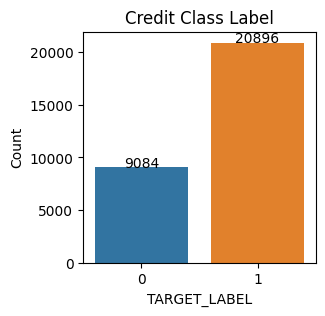

1    20896
0     9084
Name: TARGET_LABEL, dtype: int64


In [15]:
class_distribution = df['TARGET_LABEL'].value_counts()

# Plot the class distribution
plt.figure(figsize=(3, 3))
sns.countplot(x='TARGET_LABEL', data=df)
plt.title('Credit Class Label')
plt.xlabel('TARGET_LABEL')
plt.ylabel('Count')

# Display values on top of the bars
for p in range(len(class_distribution)):
    plt.text(p, class_distribution[p], class_distribution[p], ha='center')

# Show the chart
plt.show()

# Print the class distribution
print(class_distribution)

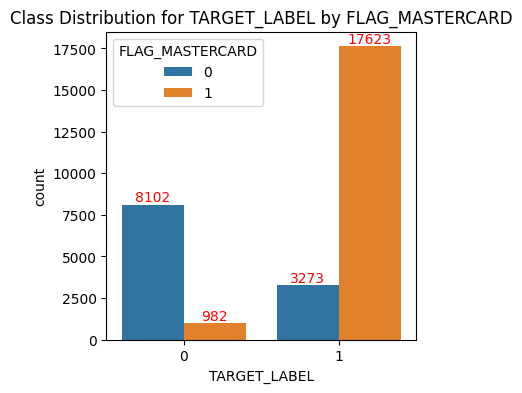

In [16]:
# Class Distribution for TARGET_LABEL by FLAG_MASTERCARD
plt.figure(figsize=(4,4))
sns.countplot(x='TARGET_LABEL', hue='FLAG_MASTERCARD', data=df)
plt.title('Class Distribution for TARGET_LABEL by FLAG_MASTERCARD')

# Get current axis on current figure
ax = plt.gca()

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
          color='red', ha='center', va='bottom')
plt.show()

In [17]:
class_distribution = df.groupby(['FLAG_MASTERCARD', 'TARGET_LABEL']).size().unstack()
class_distribution_prob = class_distribution.div(class_distribution.sum(axis=1), axis=0)

# Print the computed probabilities
print(class_distribution_prob)

TARGET_LABEL            0         1
FLAG_MASTERCARD                    
0                0.712264  0.287736
1                0.052782  0.947218


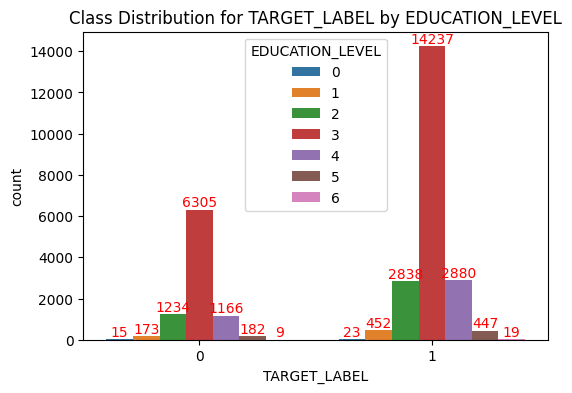

In [18]:
# Class Distribution for TARGET_LABEL by EDUCATION_LEVEL
plt.figure(figsize=(6,4))
sns.countplot(x='TARGET_LABEL', hue='EDUCATION_LEVEL', data=df)
plt.title('Class Distribution for TARGET_LABEL by EDUCATION_LEVEL')

# Get current axis on current figure
ax = plt.gca()

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
          color='red', ha='center', va='bottom')
plt.show()

In [19]:
class_distribution = df.groupby(['EDUCATION_LEVEL', 'TARGET_LABEL']).size().unstack()
class_distribution_prob = class_distribution.div(class_distribution.sum(axis=1), axis=0)

# Print the computed probabilities
print(class_distribution_prob)

TARGET_LABEL            0         1
EDUCATION_LEVEL                    
0                0.394737  0.605263
1                0.276800  0.723200
2                0.303045  0.696955
3                0.306932  0.693068
4                0.288186  0.711814
5                0.289348  0.710652
6                0.321429  0.678571


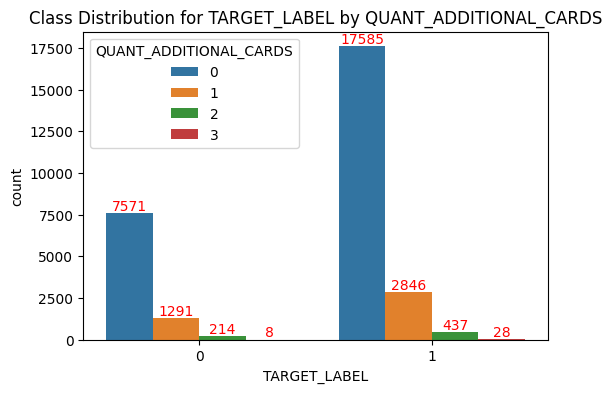

In [20]:
# Class Distribution for TARGET_LABEL by QUANT_ADDITIONAL_CARDS
plt.figure(figsize=(6,4))
sns.countplot(x='TARGET_LABEL', hue='QUANT_ADDITIONAL_CARDS', data=df)
plt.title('Class Distribution for TARGET_LABEL by QUANT_ADDITIONAL_CARDS')

# Get current axis on current figure
ax = plt.gca()

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
          color='red', ha='center', va='bottom')
plt.show()

In [21]:
class_distribution = df.groupby(['QUANT_ADDITIONAL_CARDS', 'TARGET_LABEL']).size().unstack()
class_distribution_prob = class_distribution.div(class_distribution.sum(axis=1), axis=0)

# Print the computed probabilities
print(class_distribution_prob)

TARGET_LABEL                   0         1
QUANT_ADDITIONAL_CARDS                    
0                       0.300962  0.699038
1                       0.312062  0.687938
2                       0.328725  0.671275
3                       0.222222  0.777778


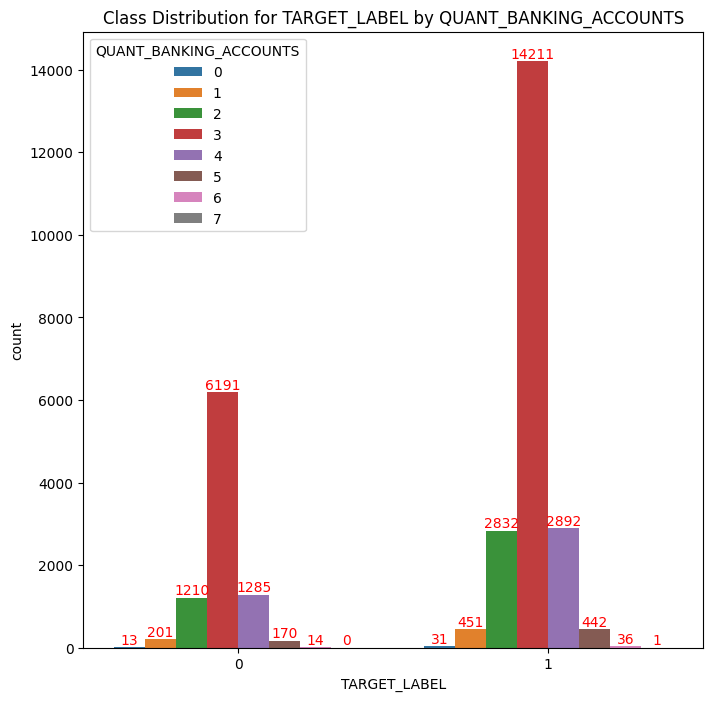

In [22]:
# Class Distribution for TARGET_LABEL by QUANT_BANKING_ACCOUNTS
plt.figure(figsize=(8,8))
sns.countplot(x='TARGET_LABEL', hue='QUANT_BANKING_ACCOUNTS', data=df)
plt.title('Class Distribution for TARGET_LABEL by QUANT_BANKING_ACCOUNTS')

# Get current axis on current figure
ax = plt.gca()

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
          color='red', ha='center', va='bottom')
plt.show()

In [23]:
class_distribution = df.groupby(['QUANT_BANKING_ACCOUNTS', 'TARGET_LABEL']).size().unstack()
class_distribution_prob = class_distribution.div(class_distribution.sum(axis=1), axis=0)

# Print the computed probabilities
print(class_distribution_prob)

TARGET_LABEL                   0         1
QUANT_BANKING_ACCOUNTS                    
0                       0.295455  0.704545
1                       0.308282  0.691718
2                       0.299357  0.700643
3                       0.303451  0.696549
4                       0.307637  0.692363
5                       0.277778  0.722222
6                       0.280000  0.720000
7                            NaN  1.000000


In [24]:
# Compute the probability of 'TARGET_LABEL' for each value of 'FLAG_EMAIL'
class_distribution_email = df.groupby(['FLAG_EMAIL', 'TARGET_LABEL']).size().unstack()
class_distribution_email_prob = class_distribution_email.div(class_distribution_email.sum(axis=1), axis=0)

# Print the computed probabilities
print(class_distribution_email_prob)

TARGET_LABEL         0         1
FLAG_EMAIL                      
0             0.306348  0.693652
1             0.299632  0.700368


In [25]:
# Compute the probability of 'TARGET_LABEL' for each value of 'PROFESSIONAL_STATE'
class_distribution_prof_state = df.groupby(['PROFESSIONAL_STATE', 'TARGET_LABEL']).size().unstack()
class_distribution_prof_state_prob = class_distribution_prof_state.div(class_distribution_prof_state.sum(axis=1), axis=0)

# Print the computed probabilities
print(class_distribution_prof_state_prob)

TARGET_LABEL               0         1
PROFESSIONAL_STATE                    
0                   0.303030  0.696970
1                   0.270531  0.729469
2                   0.310370  0.689630
3                   0.301440  0.698560
4                   0.311911  0.688089
5                   0.280967  0.719033
6                   0.294118  0.705882


In [26]:
# Compute the probability of 'TARGET_LABEL' for each value of 'PROFESSIONAL_CITY'
class_distribution_prof_city = df.groupby(['PROFESSIONAL_CITY', 'TARGET_LABEL']).size().unstack()
class_distribution_prof_city_prob = class_distribution_prof_city.div(class_distribution_prof_city.sum(axis=1), axis=0)

# Print the computed probabilities
print(class_distribution_prof_city_prob)

TARGET_LABEL              0         1
PROFESSIONAL_CITY                    
0                  0.422222  0.577778
1                  0.292187  0.707812
2                  0.306396  0.693604
3                  0.303152  0.696848
4                  0.301583  0.698417
5                  0.296296  0.703704
6                  0.138889  0.861111
7                  1.000000       NaN


In [27]:
# Removing variables with less significance
attributes_to_exclude = ["FLAG_EMAIL", "PROFESSIONAL_STATE", "PROFESSIONAL_CITY"]
df = df.drop(attributes_to_exclude, axis=1)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29980 entries, 0 to 29979
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   CLERK_TYPE                      29980 non-null  int64
 1   PAYMENT_DAY                     29980 non-null  int64
 2   APPLICATION_SUBMISSION_TYPE     29980 non-null  int64
 3   QUANT_ADDITIONAL_CARDS          29980 non-null  int64
 4   POSTAL_ADDRESS_TYPE             29980 non-null  int64
 5   SEX                             29980 non-null  int64
 6   MARITAL_STATUS                  29980 non-null  int64
 7   QUANT_DEPENDANTS                29980 non-null  int64
 8   EDUCATION_LEVEL                 29980 non-null  int64
 9   STATE_OF_BIRTH                  29980 non-null  int64
 10  CITY_OF_BIRTH                   29980 non-null  int64
 11  NACIONALITY                     29980 non-null  int64
 12  FLAG_RESIDENCIAL_PHONE          29980 non-null  int64
 13  R

In [29]:
print(df.isnull().sum())

CLERK_TYPE                        0
PAYMENT_DAY                       0
APPLICATION_SUBMISSION_TYPE       0
QUANT_ADDITIONAL_CARDS            0
POSTAL_ADDRESS_TYPE               0
SEX                               0
MARITAL_STATUS                    0
QUANT_DEPENDANTS                  0
EDUCATION_LEVEL                   0
STATE_OF_BIRTH                    0
CITY_OF_BIRTH                     0
NACIONALITY                       0
FLAG_RESIDENCIAL_PHONE            0
RESIDENCIAL_PHONE_AREA_CODE       0
RESIDENCE_TYPE                    0
MONTHS_IN_RESIDENCE               0
FLAG_MOBILE_PHONE                 0
FLAG_VISA                         0
FLAG_MASTERCARD                   0
FLAG_DINERS                       0
FLAG_AMERICAN_EXPRESS             0
FLAG_OTHER_CARDS                  0
QUANT_BANKING_ACCOUNTS            0
QUANT_SPECIAL_BANKING_ACCOUNTS    0
COMPANY                           0
PROFESSIONAL_BOROUGH              0
FLAG_PROFESSIONAL_PHONE           0
PROFESSIONAL_PHONE_AREA_CODE

In [30]:
X = df.drop(['TARGET_LABEL'], axis = 1)  # independent variables after droping class variable from the dataframe
y = df.TARGET_LABEL # Target variable

In [31]:
# Split our data into training (70%) and test sets (30%) using train_test_split()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69)

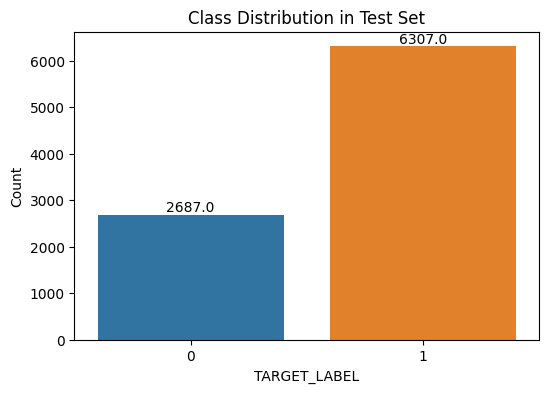

1    6307
0    2687
Name: TARGET_LABEL, dtype: int64


In [32]:
# Calculate class distribution in the test set
class_distribution_test = y_test.value_counts()

# Create a bar chart to visualize the class distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=class_distribution_test.index, y=class_distribution_test.values)
plt.title('Class Distribution in Test Set')
plt.xlabel('TARGET_LABEL')
plt.ylabel('Count')

# Annotate the bars with values
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', color='black', size=10)

plt.show()
# Print the class distribution for test set
print(class_distribution_test)


In [33]:
# Include library and create a MultinomialNB object
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [34]:
# Train the MultinomialNB Classifier
model = nb.fit(X_train,y_train)

In [35]:
# save the prediction on the test set from the model into "predicted" list
predicted = model.predict(X_test)

print(predicted)

[1 1 0 ... 1 1 1]


In [36]:
print("accuracy: ", np.mean(predicted == y_test))

accuracy:  0.8590171225261285


In [37]:
# Confusion Matris
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predicted))

[[2102  585]
 [ 683 5624]]


In [38]:
# Classification Report
from sklearn.metrics import classification_report
print (classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.75      0.78      0.77      2687
           1       0.91      0.89      0.90      6307

    accuracy                           0.86      8994
   macro avg       0.83      0.84      0.83      8994
weighted avg       0.86      0.86      0.86      8994



In [39]:
!pip install scikit-plot
import scikitplot as skplt

In [40]:
predicted_probas = model.predict_proba(X_test)

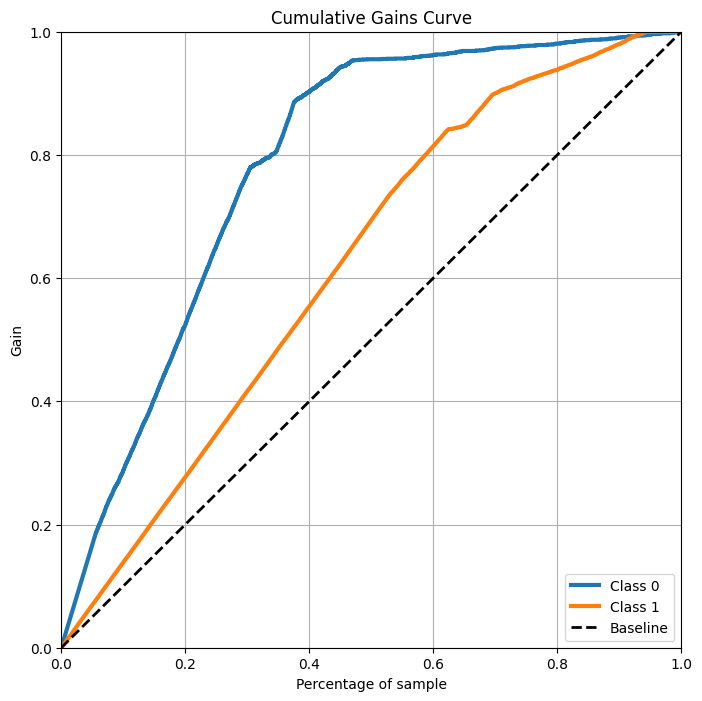

In [41]:
# Cumulative gain chart
skplt.metrics.plot_cumulative_gain(y_true=y_test, y_probas=predicted_probas, figsize=(8, 8))
plt.show()

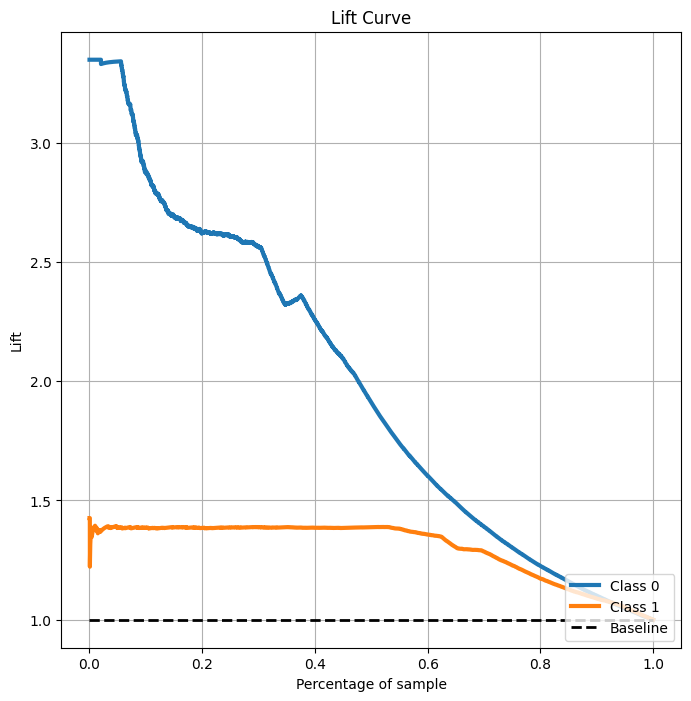

In [42]:
# Lift chart
skplt.metrics.plot_lift_curve(y_test, predicted_probas, figsize=(8, 8))
plt.show()

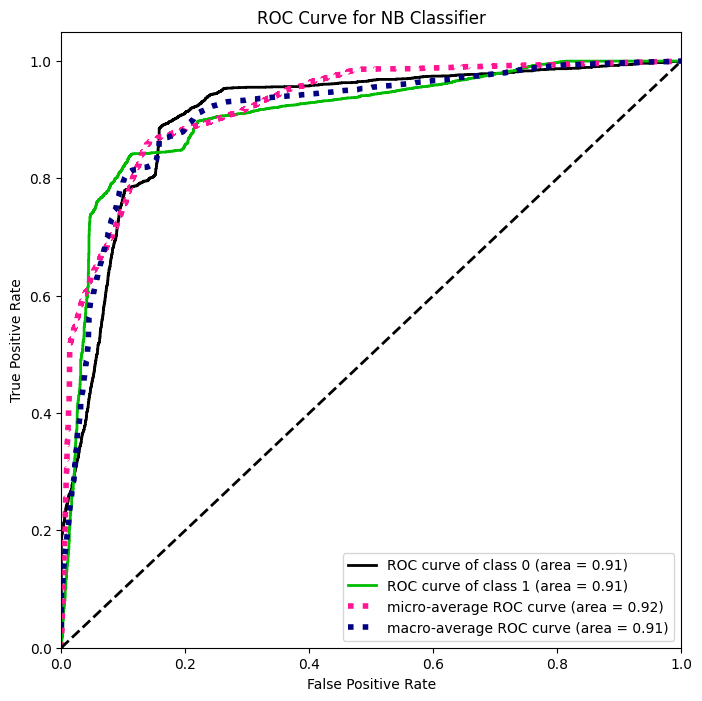

In [43]:
# ROC Curve
skplt.metrics.plot_roc(y_test, predicted_probas, figsize=(8, 8), title="ROC Curve for NB Classifier")
plt.show()

In [44]:
# R^2, on the train set
nb.score(X_train, y_train)

0.8610025731440007

In [45]:
# Permutation Importance

from sklearn.inspection import permutation_importance
imps = permutation_importance(nb, X_train, y_train, random_state=42)

# print the mean value of permutation importances score (importances_mean) for each column
print(imps.importances_mean)

[-9.53016297e-06 -3.78347470e-03  9.53016297e-06 -7.62413037e-05
  9.53016297e-06  6.67111408e-05  8.57714667e-05  2.85904889e-05
  9.53016297e-06  5.71809778e-05  9.53016297e-06  1.90603259e-05
  3.81206519e-05  3.81206519e-05  1.23892119e-04  9.53016297e-06
  0.00000000e+00 -1.90603259e-05  1.21547698e-01 -1.90603259e-05
 -1.90603259e-05  3.81206519e-05  6.67111408e-05  3.81206519e-05
 -2.85904889e-05 -5.71809778e-05  0.00000000e+00  4.76508148e-05
  1.90603259e-05  1.33422282e-04  4.76508148e-05  9.53016297e-06
  1.00857715e-01  0.00000000e+00  5.71809778e-05  1.33422282e-04
  5.71809778e-05  1.90603259e-05  4.76508148e-05 -4.76508148e-05]


In [46]:
# Sort and print permutation_importance() for each column
sorted_col = []

# sort columns index in descending order based on the mean value of permutation importances score
for i in imps.importances_mean.argsort()[::-1]:
#    if imps.importances_mean[i] - 2 * imps.importances_std[i] > 0:
            # append column names (columns.values) to sorted_col
            sorted_col.append(X_train.columns.values[i])
            # print out column names (columns.values) followed by mean value of permutation importances score
            print(f"{X_train.columns.values[i]: <50}" f": " f"{imps.importances_mean[i]:.3f}")

FLAG_MASTERCARD                                   : 0.122
FLAG_HOME_ADDRESS_DOCUMENT                        : 0.101
FLAG_INCOME_PROOF                                 : 0.000
OCCUPATION_TYPE                                   : 0.000
RESIDENCE_TYPE                                    : 0.000
MARITAL_STATUS                                    : 0.000
QUANT_BANKING_ACCOUNTS                            : 0.000
SEX                                               : 0.000
PRODUCT                                           : 0.000
FLAG_CPF                                          : 0.000
STATE_OF_BIRTH                                    : 0.000
RESIDENCIAL_ZIP_3                                 : 0.000
PROFESSIONAL_PHONE_AREA_CODE                      : 0.000
MATE_PROFESSION_CODE                              : 0.000
FLAG_RESIDENCIAL_PHONE                            : 0.000
RESIDENCIAL_PHONE_AREA_CODE                       : 0.000
FLAG_OTHER_CARDS                                  : 0.000
QUANT_SPECIAL_

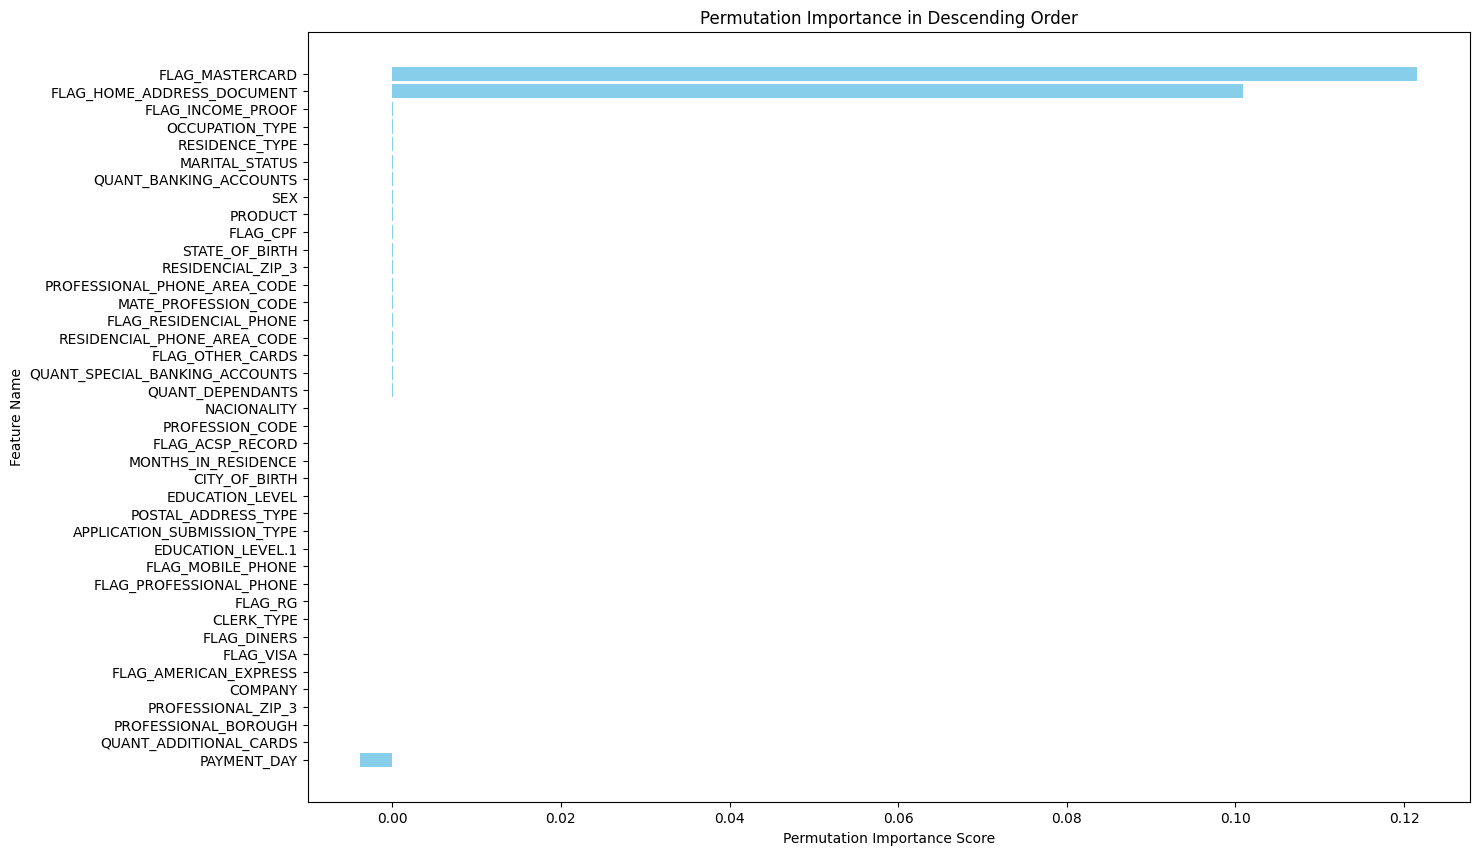

In [47]:
# Get the feature names in descending order of importance
sorted_feature_names = [X_train.columns[i] for i in imps.importances_mean.argsort()[::-1]]

# Get the corresponding permutation importance values
sorted_importance_values = [imps.importances_mean[i] for i in imps.importances_mean.argsort()[::-1]]

# Create a bar chart to visualize permutation importance
plt.figure(figsize=(15, 10))
plt.barh(sorted_feature_names, sorted_importance_values, color='skyblue')
plt.title('Permutation Importance in Descending Order')
plt.xlabel('Permutation Importance Score')
plt.ylabel('Feature Name')

plt.gca().invert_yaxis()  # Invert the y-axis for better visualization

plt.show()


**Implementation of Gaussian Naive Bayes**

In [48]:
gtrain = pd.read_csv('Roy_NB_train.csv')

In [49]:
attributes_to_exclude = ["ID_CLIENT", "FLAG_EMAIL", "PROFESSIONAL_STATE", "PROFESSIONAL_CITY", "RESIDENCIAL_STATE", "RESIDENCIAL_CITY", "RESIDENCIAL_BOROUGH", "STATE_OF_BIRTH", "CITY_OF_BIRTH", "FLAG_RESIDENCIAL_PHONE", "RESIDENCIAL_PHONE_AREA_CODE"]
gtrain = gtrain.drop(attributes_to_exclude, axis=1)

In [50]:
gtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29980 entries, 0 to 29979
Data columns (total 43 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   CLERK_TYPE                      29980 non-null  int64
 1   PAYMENT_DAY                     29980 non-null  int64
 2   APPLICATION_SUBMISSION_TYPE     29980 non-null  int64
 3   QUANT_ADDITIONAL_CARDS          29980 non-null  int64
 4   POSTAL_ADDRESS_TYPE             29980 non-null  int64
 5   SEX                             29980 non-null  int64
 6   MARITAL_STATUS                  29980 non-null  int64
 7   QUANT_DEPENDANTS                29980 non-null  int64
 8   EDUCATION_LEVEL                 29980 non-null  int64
 9   NACIONALITY                     29980 non-null  int64
 10  RESIDENCE_TYPE                  29980 non-null  int64
 11  MONTHS_IN_RESIDENCE             29980 non-null  int64
 12  FLAG_MOBILE_PHONE               29980 non-null  int64
 13  P

In [51]:
print(gtrain.isnull().sum())

CLERK_TYPE                        0
PAYMENT_DAY                       0
APPLICATION_SUBMISSION_TYPE       0
QUANT_ADDITIONAL_CARDS            0
POSTAL_ADDRESS_TYPE               0
SEX                               0
MARITAL_STATUS                    0
QUANT_DEPENDANTS                  0
EDUCATION_LEVEL                   0
NACIONALITY                       0
RESIDENCE_TYPE                    0
MONTHS_IN_RESIDENCE               0
FLAG_MOBILE_PHONE                 0
PERSONAL_MONTHLY_INCOME           0
OTHER_INCOMES                     0
FLAG_VISA                         0
FLAG_MASTERCARD                   0
FLAG_DINERS                       0
FLAG_AMERICAN_EXPRESS             0
FLAG_OTHER_CARDS                  0
QUANT_BANKING_ACCOUNTS            0
QUANT_SPECIAL_BANKING_ACCOUNTS    0
PERSONAL_ASSETS_VALUE             0
QUANT_CARS                        0
COMPANY                           0
PROFESSIONAL_BOROUGH              0
FLAG_PROFESSIONAL_PHONE           0
PROFESSIONAL_PHONE_AREA_CODE

In [52]:
# Build arrays, X and y, for independent and class variables, respectively
X = gtrain.drop(['TARGET_LABEL'], axis = 1)  # independent variables after droping class variable from the dataframe
y = gtrain.TARGET_LABEL # Target variable

In [53]:
# Split our data into training (70%) and test sets (30%) using train_test_split()
from sklearn.model_selection import train_test_split
X_gtrain, X_gtest, y_gtrain, y_gtest = train_test_split(X, y, test_size=0.3, random_state=69)

In [54]:
# Initialize our GaussianNB classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

# Train our GaussianNB classifier
gmodel = gnb.fit(X_gtrain, y_gtrain)

# save the prediction from the model on test set into predicted list
predicted = gmodel.predict(X_gtest)

# print out classification_report()
print (classification_report(y_gtest, predicted))



              precision    recall  f1-score   support

           0       0.69      0.81      0.75      2687
           1       0.91      0.85      0.88      6307

    accuracy                           0.84      8994
   macro avg       0.80      0.83      0.81      8994
weighted avg       0.85      0.84      0.84      8994



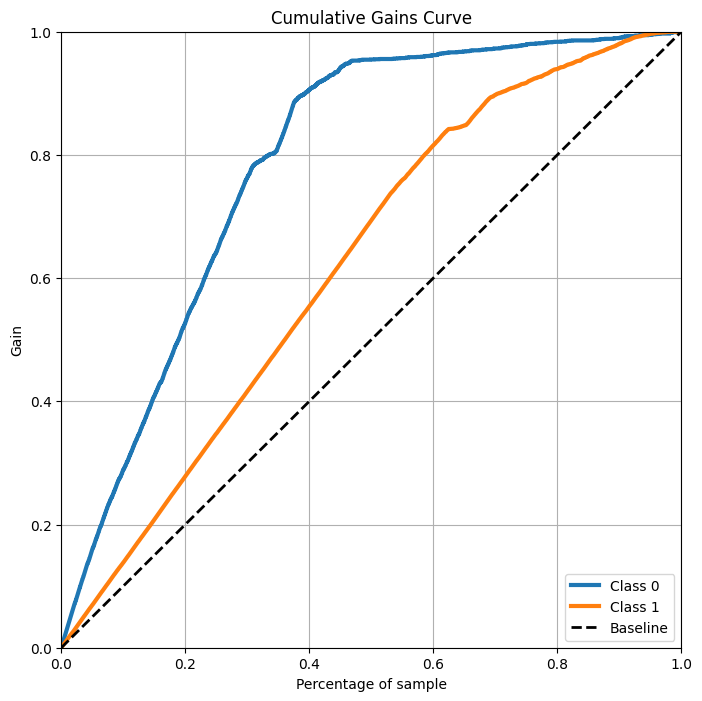

In [55]:
# Cumulative Gain Chart
g_predicted_probas = gmodel.predict_proba(X_gtest)

skplt.metrics.plot_cumulative_gain(y_true=y_gtest, y_probas=g_predicted_probas, figsize=(8, 8))
plt.show()

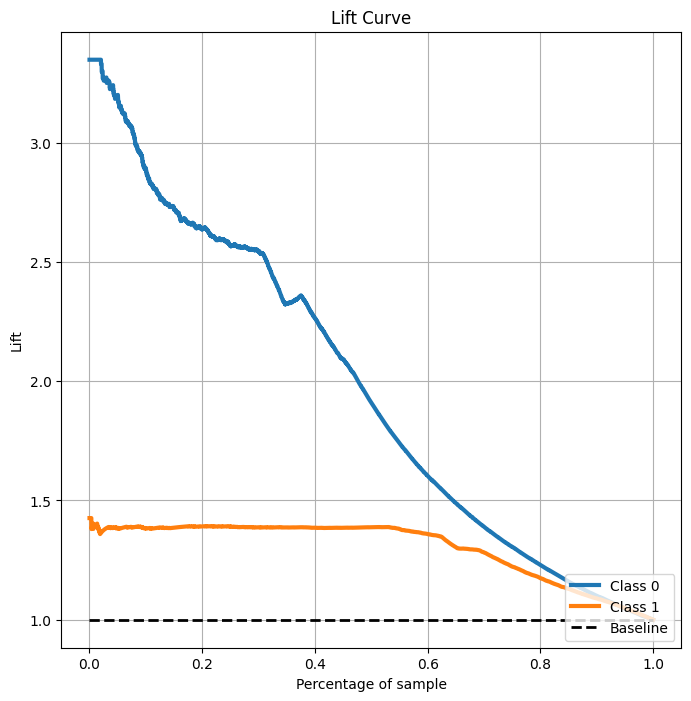

In [56]:
# show lift chart
skplt.metrics.plot_lift_curve(y_gtest, g_predicted_probas, figsize=(8, 8))
plt.show()

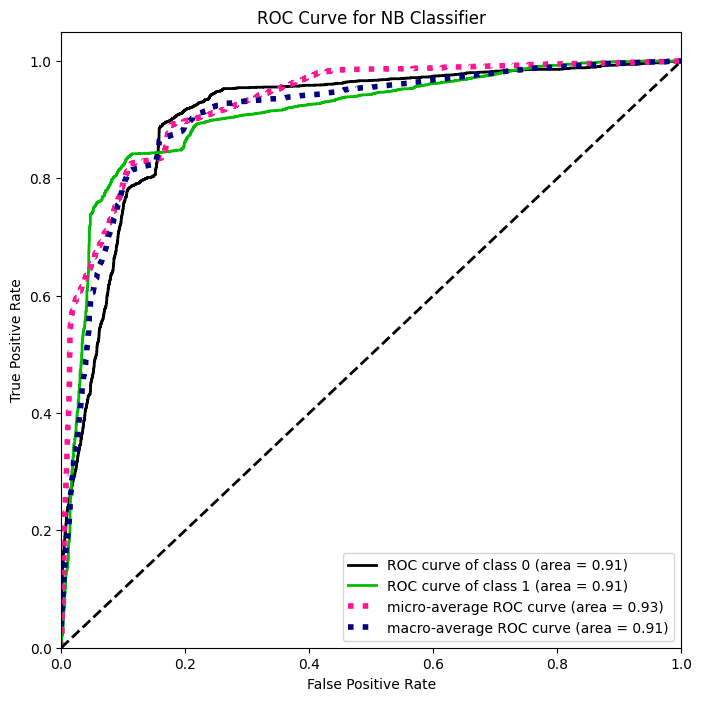

In [57]:
# show ROC Curve
skplt.metrics.plot_roc(y_gtest, g_predicted_probas, figsize=(8, 8), title="ROC Curve for NB Classifier")
plt.show()

In [58]:
# Permutation Importance
from sklearn.inspection import permutation_importance
g_imps = permutation_importance(gnb, X_gtrain, y_gtrain, random_state=42)

# print the mean value of permutation importances score (importances_mean) for each column
print(g_imps.importances_mean)

[ 0.00000000e+00 -2.30915849e-02  6.67111408e-05 -2.85904889e-05
  2.85904889e-05  0.00000000e+00  0.00000000e+00  1.81073096e-04
  1.90603259e-04  9.53016297e-06  1.42952444e-04  1.90603259e-05
  0.00000000e+00  6.67111408e-05  1.23892119e-04 -2.85904889e-05
  1.11112170e-01  9.53016297e-05  3.90736682e-04 -5.71809778e-05
  1.90603259e-05  2.28723911e-04  1.33422282e-04  3.81206519e-05
  5.71809778e-05  2.38254074e-04  8.57714667e-05  1.71542933e-04
  4.28857333e-04  2.85904889e-05  4.19327170e-04  4.76508148e-05
  1.14361956e-04  8.15019537e-02  1.23892119e-04  2.57314400e-04
  9.53016297e-05  0.00000000e+00  9.53016297e-06  5.71809778e-05
  7.62413037e-05  1.90603259e-05]


In [59]:
# Sort and print permutation_importance() for each column
sorted_col = []

# sort columns index in descending order based on the mean value of permutation importances score
for i in g_imps.importances_mean.argsort()[::-1]:
#    if imps.importances_mean[i] - 2 * imps.importances_std[i] > 0:
            # append column names (columns.values) to sorted_col
            sorted_col.append(X_gtrain.columns.values[i])
            # print out column names (columns.values) followed by mean value of permutation importances score
            print(f"{X_gtrain.columns.values[i]: <50}" f": " f"{g_imps.importances_mean[i]:.3f}")

FLAG_MASTERCARD                                   : 0.111
FLAG_HOME_ADDRESS_DOCUMENT                        : 0.082
MONTHS_IN_THE_JOB                                 : 0.000
OCCUPATION_TYPE                                   : 0.000
FLAG_AMERICAN_EXPRESS                             : 0.000
FLAG_CPF                                          : 0.000
PROFESSIONAL_BOROUGH                              : 0.000
QUANT_SPECIAL_BANKING_ACCOUNTS                    : 0.000
EDUCATION_LEVEL                                   : 0.000
QUANT_DEPENDANTS                                  : 0.000
PROFESSIONAL_PHONE_AREA_CODE                      : 0.000
RESIDENCE_TYPE                                    : 0.000
PERSONAL_ASSETS_VALUE                             : 0.000
FLAG_RG                                           : 0.000
OTHER_INCOMES                                     : 0.000
EDUCATION_LEVEL.1                                 : 0.000
FLAG_DINERS                                       : 0.000
FLAG_INCOME_PR

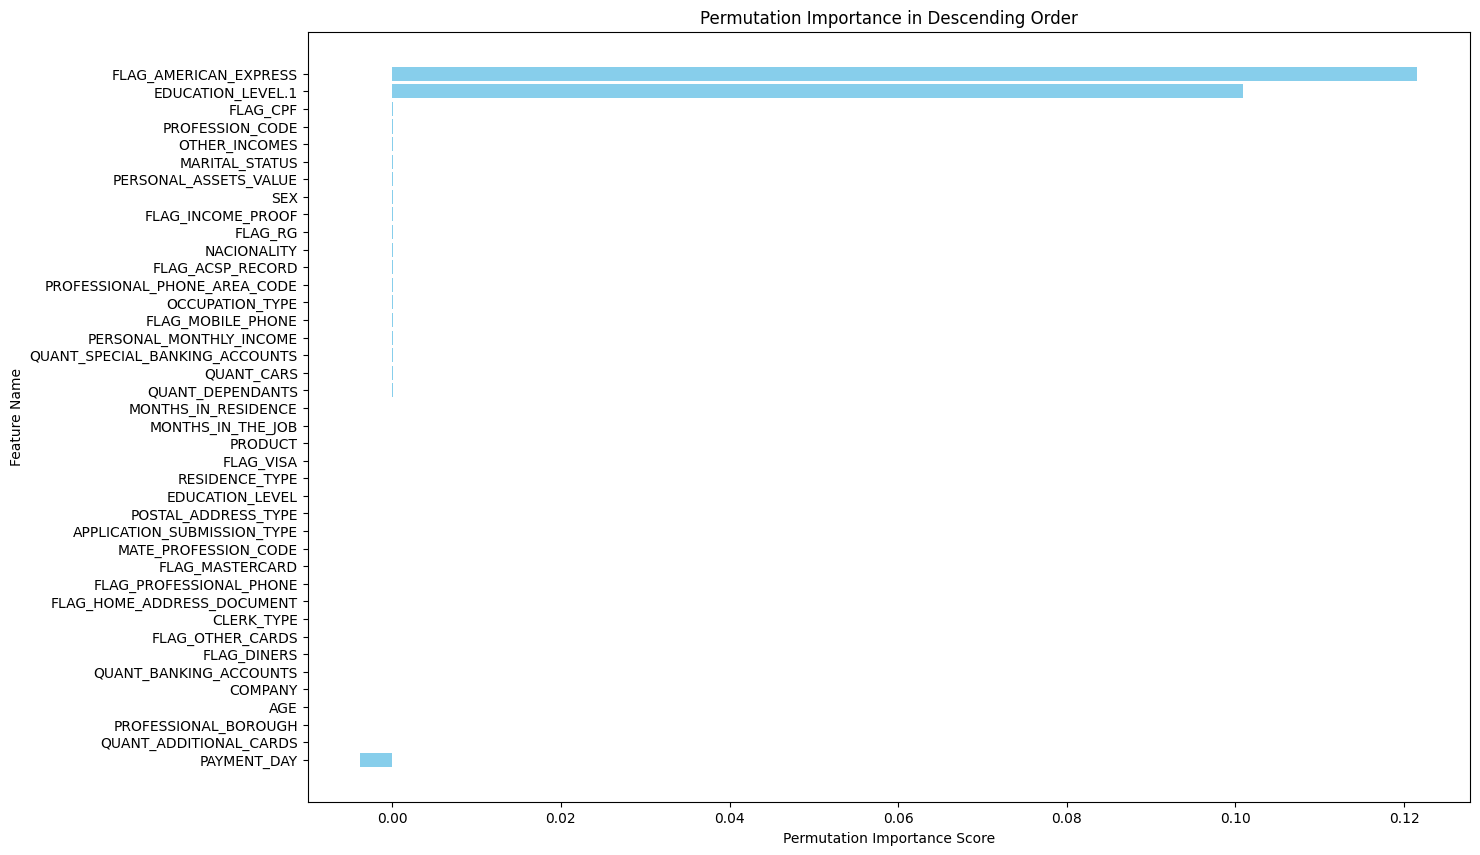

In [60]:
# Get the feature names in descending order of importance
sorted_feature_names = [X_gtrain.columns[i] for i in imps.importances_mean.argsort()[::-1]]

# Get the corresponding permutation importance values
sorted_importance_values = [imps.importances_mean[i] for i in imps.importances_mean.argsort()[::-1]]

# Create a bar chart to visualize permutation importance
plt.figure(figsize=(15, 10))
plt.barh(sorted_feature_names, sorted_importance_values, color='skyblue')
plt.title('Permutation Importance in Descending Order')
plt.xlabel('Permutation Importance Score')
plt.ylabel('Feature Name')

plt.gca().invert_yaxis()  # Invert the y-axis for better visualization

plt.show()